In [6]:
#初期設定+関数

import glob
import os
import subprocess
import librosa
import soundfile
import datetime
import librosa.display
import shutil

import soundfile as sf
import numpy as np
from matplotlib import pyplot as plt

#xと一致した要素が配列の何番目かを取得
def my_index_multi(l, x):
    return [i for i, _x in enumerate(l) if _x == x]

#フォルダの中身削除
def remove_dir(dirname):
    shutil.rmtree(dirname)
    os.mkdir(dirname)

In [7]:
#ファイルの名前づけ
def fileRename(firstNum):
    #変換後のフォルダ削除
    shutil.rmtree(DIR_m4a)
    remove_dir(DIR_m4a_change)
    remove_dir(DIR_wav)
    remove_dir(DIR_wav_cut)
    remove_dir(DIR_wav_change)
    
    #元データをコピー
    shutil.copytree(DIR_m4a_raw, DIR_m4a)
    
    xs = []
    for root, dir, files in os.walk(DIR_m4a):
        for f in files:
            path = os.path.join(root, f)
            xs.append((os.path.getmtime(path), path))

    count = firstNum - 1
    for mtime, path in sorted(xs):
        count = count + 1
        name = os.path.basename(path)
        t = datetime.datetime.fromtimestamp(mtime)
        os.rename(DIR_m4a + '/' + name,DIR_m4a_change + '/{0:04d}'.format(count) +'_' + LangName +'.m4a')

In [26]:
#mp4をwavに変換+音声カット
def mp4towav():
    #global filename_m4a
    filename_m4a = glob.glob(DIR_m4a_change + '/*.m4a')

    fileNum = sum(os.path.isfile(os.path.join(DIR_m4a_change, name)) for name in os.listdir(DIR_m4a_change))

    for num in range(fileNum):
        basename_without_ext = os.path.splitext(os.path.basename(filename_m4a[num]))[0]
        newname = DIR_wav + '/%s.wav' % basename_without_ext
        cmd = 'ffmpeg -i %s -f wav %s' %(filename_m4a[num], newname)
        subprocess.run(cmd, shell=True)

        #音声をカット
        data, samplerate = sf.read(newname)
        t = np.arange(0, len(data))/samplerate
        b = abs(data) > 0.025 #閾値仮置き→閾値より大きい場合1,小さい場合0
        
        print(newname)
        plt.figure(figsize=(18, 6))
        plt.plot(t,abs(data))
        plt.plot(t, b)
        plt.show()

        high_num = my_index_multi(b, 1) #閾値を超えたデータを抜き出し
        high_num_first = high_num[0]
        high_num_last = high_num[-1]#配列の最後を取り出す

        data_cut = data[high_num_first:high_num_last]

        soundfile.write(DIR_wav_cut + '/%s.wav' %(basename_without_ext), data_cut, samplerate)
        
        #声変更
        #y, sr = librosa.load(DIR_wav_cut + '/%s.wav' %(basename_without_ext), sr=24000) # y is a numpy array of the wav file, sr = sample rate
        #y_shifted = librosa.effects.pitch_shift(y, sr, n_steps=2) # shifted by 4 half steps
        #soundfile.write(DIR_wav_change + '/%s.wav' %(basename_without_ext), y_shifted, sr)

In [27]:
#言語を選択+実行
def Lang_select(JorT,firstNumber):
    if 'J'==JorT:
        DIR_lang = 'soundJapanese'
    elif 'T'==JorT:
        DIR_lang = 'soundTaiwanese'
    else:
        DIR_lang = '0'
        print('error')
    
    global LangName
    global DIR_m4a_raw
    global DIR_m4a
    global DIR_m4a_change
    global DIR_wav
    global DIR_wav_cut
    global DIR_wav_change
    
    LangName = JorT
    DIR_m4a_raw = './' + DIR_lang + '/m4a_raw'
    DIR_m4a = './' + DIR_lang + '/m4a'
    DIR_m4a_change = './' + DIR_lang + '/m4a_change'
    DIR_wav =  './' + DIR_lang + '/wav'
    DIR_wav_cut =  './' + DIR_lang + '/wav_cut'
    DIR_wav_change =  './' + DIR_lang + '/wav_change'
    
    fileRename(firstNumber)
    mp4towav()

./soundTaiwanese/wav/0004_T.wav


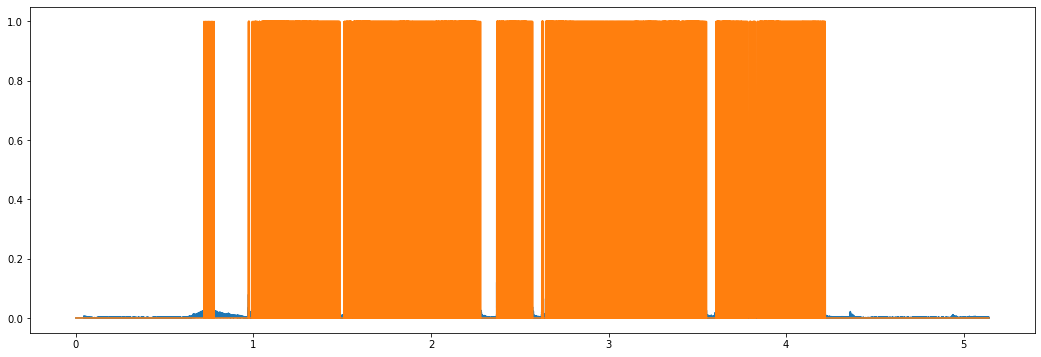

./soundTaiwanese/wav/0006_T.wav


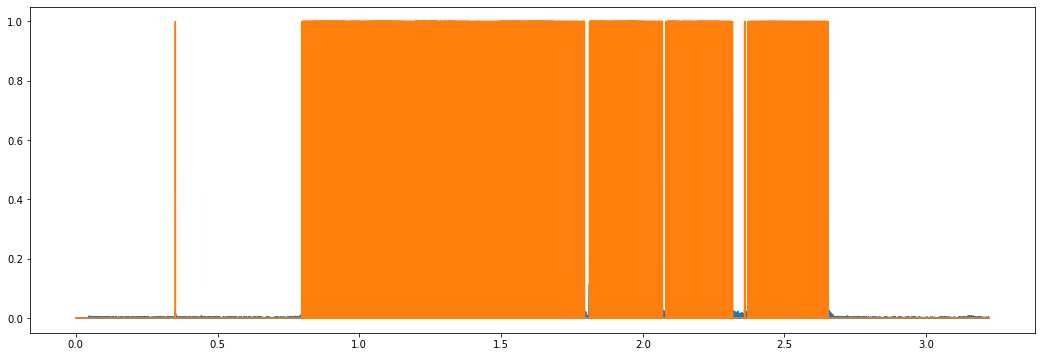

./soundTaiwanese/wav/0002_T.wav


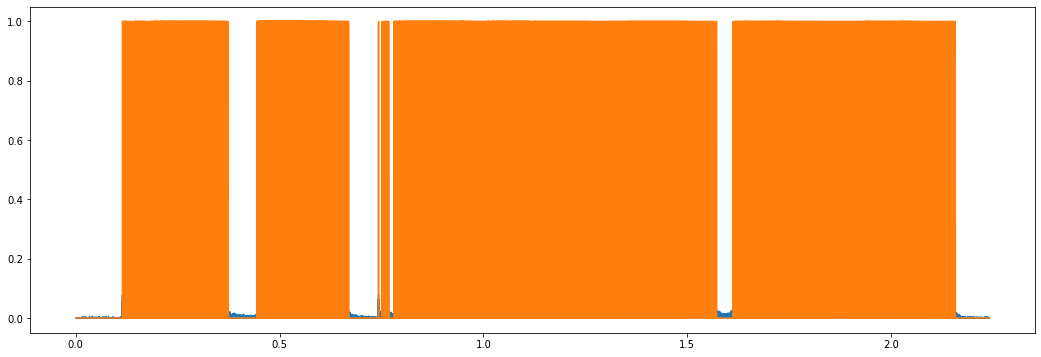

./soundTaiwanese/wav/0007_T.wav


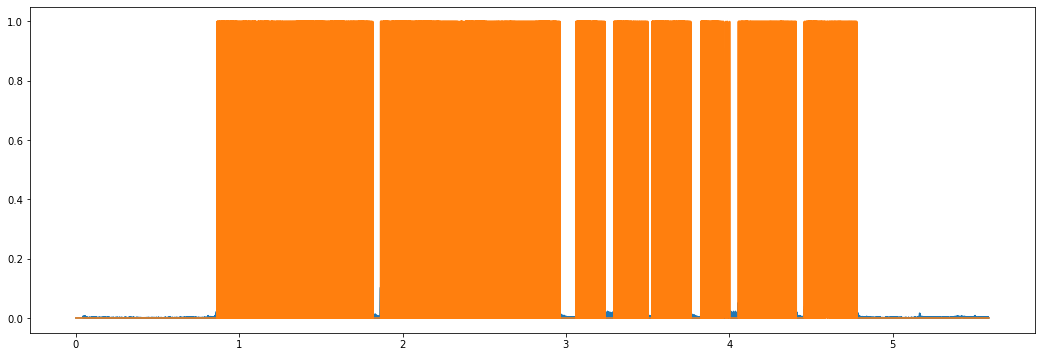

./soundTaiwanese/wav/0005_T.wav


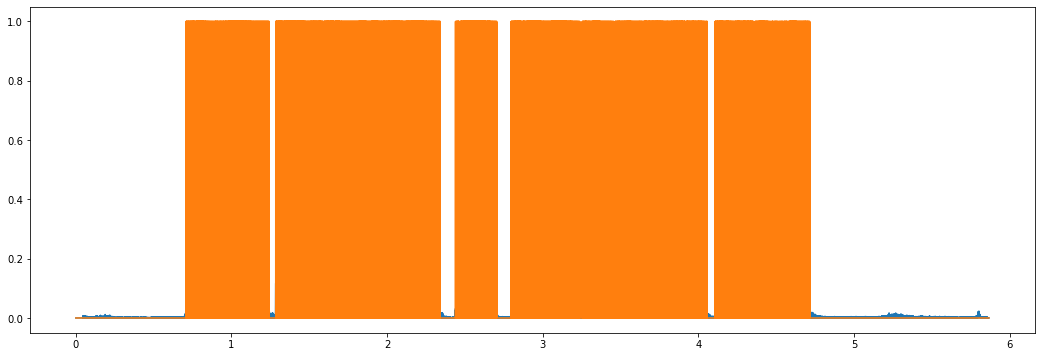

./soundTaiwanese/wav/0001_T.wav


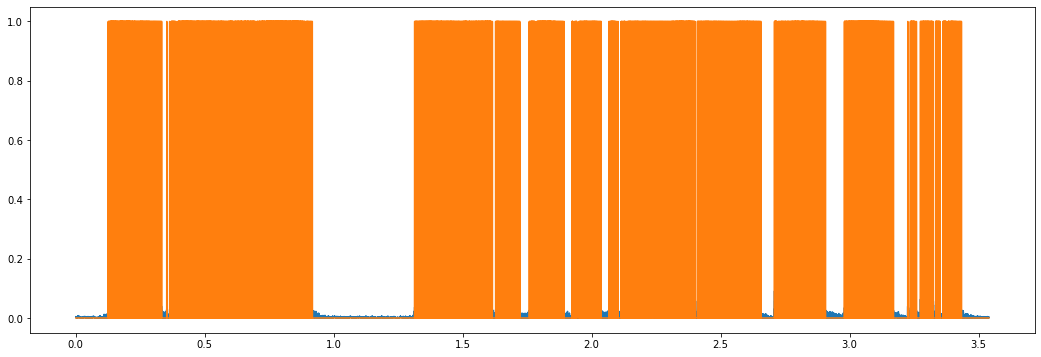

./soundTaiwanese/wav/0003_T.wav


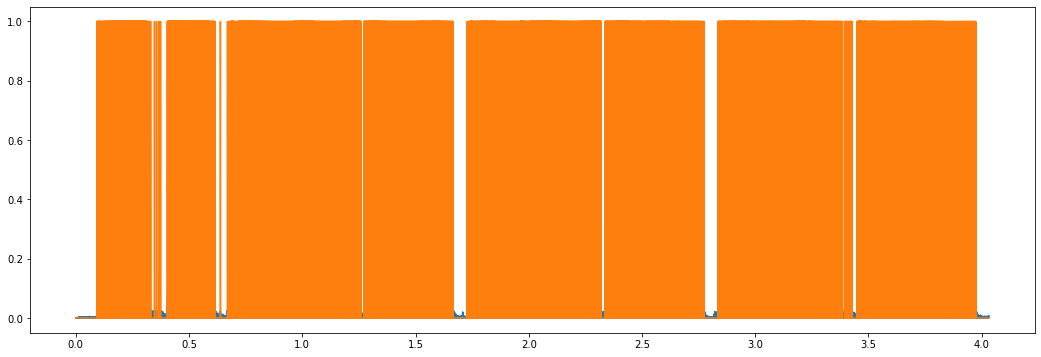

./soundTaiwanese/wav/0014_T.wav


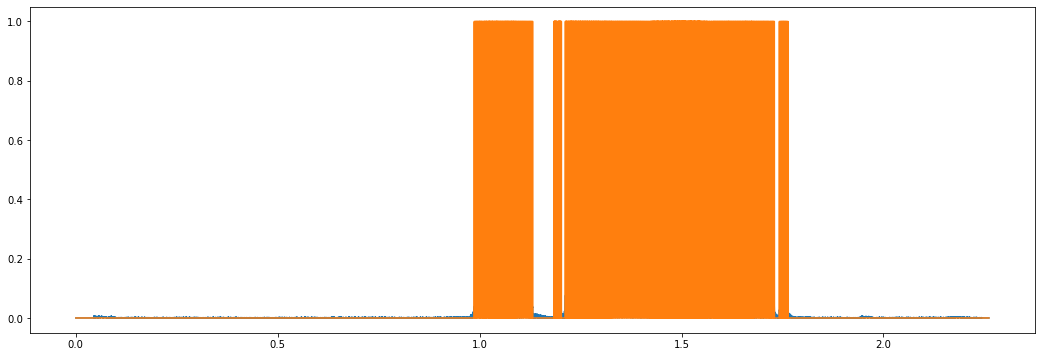

./soundTaiwanese/wav/0009_T.wav


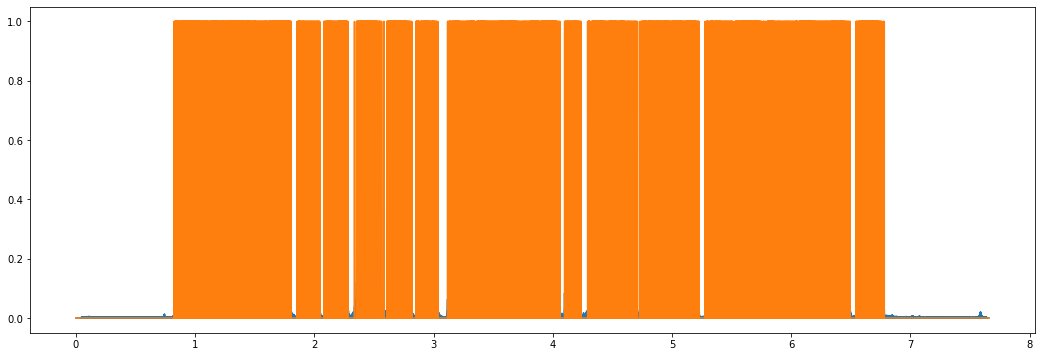

./soundTaiwanese/wav/0010_T.wav


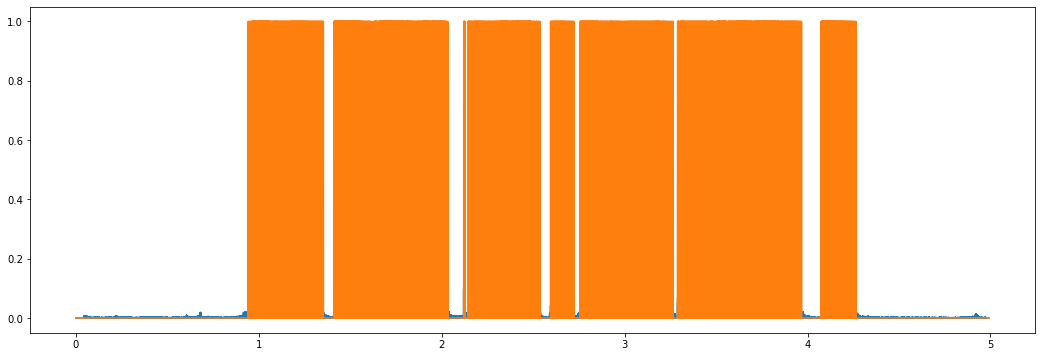

./soundTaiwanese/wav/0012_T.wav


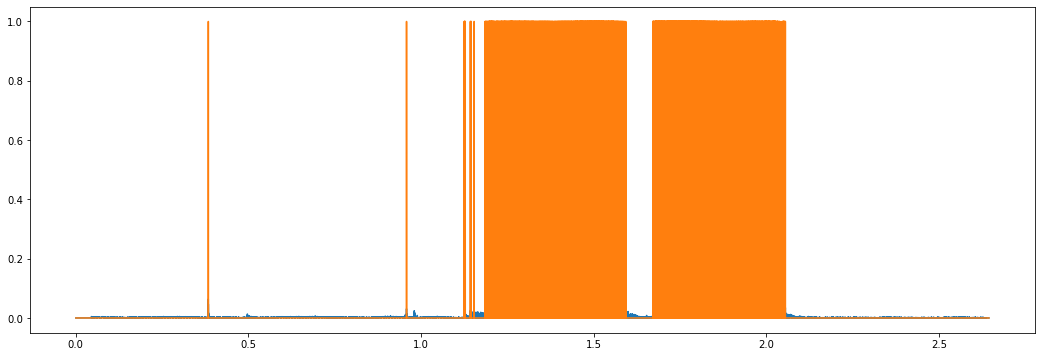

./soundTaiwanese/wav/0013_T.wav


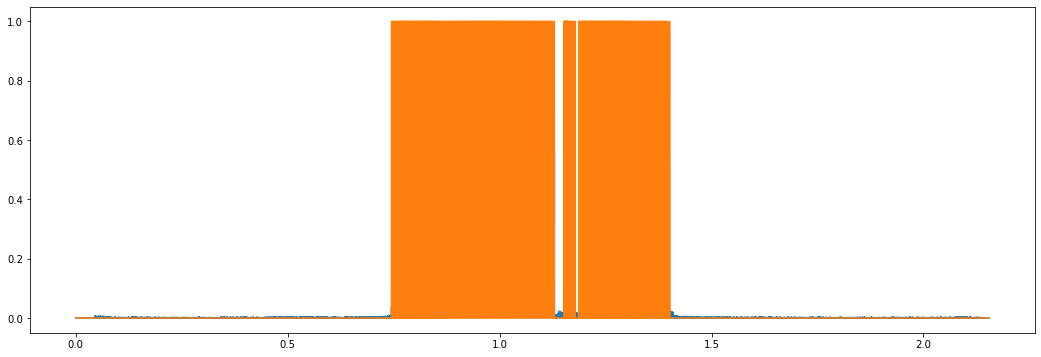

./soundTaiwanese/wav/0008_T.wav


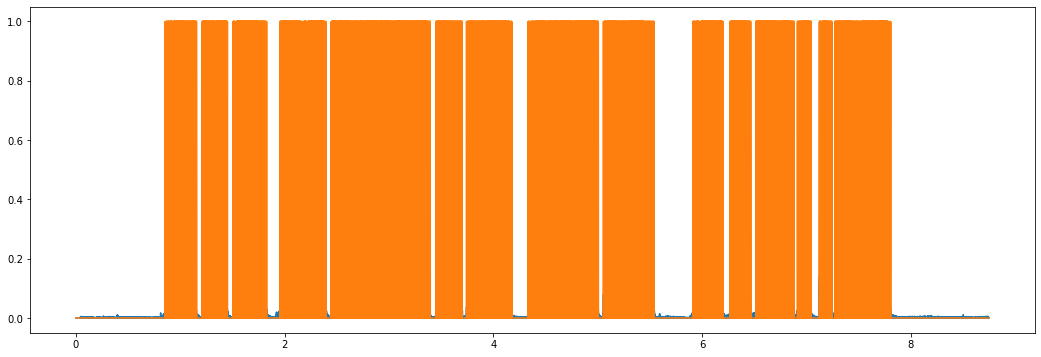

./soundTaiwanese/wav/0011_T.wav


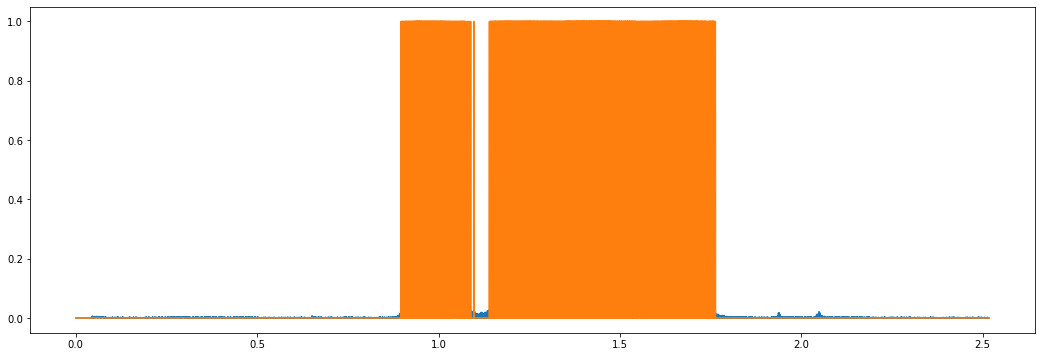

In [28]:
Lang_select('T',1)